In [39]:
# Sales Analysis

# Merge the 12 months of sales into a single CSV file

In [77]:
import pandas as pd
import os

import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
# Taking a look at the signle month data:

df = pd.read_csv('./SalesAnalysis/Sales_Data/Sales_April_2019.csv')
df.head(4)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [42]:
# Taking a loook at the files to merge:

files = [file for file in os.listdir('./SalesAnalysis/Sales_Data')]

for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [48]:
# Merging single files into one:

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('./SalesAnalysis/Sales_Data/'+file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv('./SalesAnalysis/all_data.csv', index=False)

all_data = pd.read_csv('./SalesAnalysis/all_data.csv')

all_data.head(4)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [50]:
# Modifying the names of the columns:

all_data.columns = (all_data.columns.str.replace(' ', '_')).str.lower()

all_data.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [51]:
# Cleaning up the data:

# Drop rows of NaNs:

nan_df = all_data[all_data.isna().any(axis=1)]

nan_df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
# Since there are a lot of columns wich contain NaNs - I'll remove such strings:

all_data= all_data.dropna(how='all')

all_data.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [53]:
# In the further analysis I've found out that the Order Date column contains 'Or' letters. 
# So, let's get rid of them as well:

all_data = all_data[all_data['order_date'].str[0:2] != "Or"]

In [65]:
# Let's make sure that the necessary columns have the numeric values:

all_data.dtypes

order_id            object
product             object
quantity_ordered    object
price_each          object
order_date          object
purchase_address    object
month                int32
dtype: object

In [69]:
#  Let's change the types of the necessary columns to numeric:

all_data.quantity_ordered = pd.to_numeric(all_data.quantity_ordered)
all_data.price_each = pd.to_numeric(all_data.price_each)

all_data.dtypes

order_id             object
product              object
quantity_ordered      int64
price_each          float64
order_date           object
purchase_address     object
month                 int32
dtype: object

In [59]:
# Adding month column:

all_data['month'] = all_data['order_date'].str[0:2].astype('int32')

all_data.head(3)

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4


In [71]:
# Adding the sales column:
all_data['sales'] = all_data.quantity_ordered.mul(all_data.price_each)

all_data.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [76]:
# Task #1: Find the best month in terms of sales. What was the turnover that month?

all_data.groupby('month').sum().sort_values('sales', ascending=False)

,quantity_ordered,price_each,sales
month,,,
12,28114,4.588415e+06,4.613443e+06
10,22703,3.715555e+06,3.736727e+06
4,20558,3.367671e+06,3.390670e+06
11,19798,3.180601e+06,3.199603e+06
5,18667,3.135125e+06,3.152607e+06
3,17005,2.791208e+06,2.807100e+06
7,16072,2.632540e+06,2.647776e+06
6,15253,2.562026e+06,2.577802e+06
8,13448,2.230345e+06,2.244468e+06


Text(0.5, 0, 'Month  number')

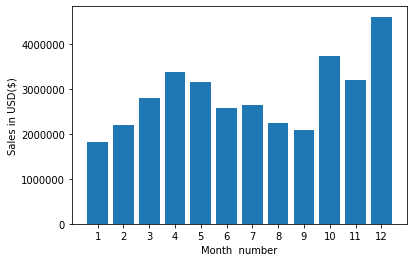

In [84]:
# Visualizing sales by months:

sales = all_data.groupby('month').sum()

months = range(1, 13)

plt.bar(months, sales.sales)
plt.xticks(months)
plt.ylabel("Sales in USD($)")
plt.xlabel("Month  number")

In [102]:
# Task #2: Find the city which had the highest number of sales.

all_data.head()

all_data.purchase_address.head()

0            917 1st St, Dallas, TX 75001
2       682 Chestnut St, Boston, MA 02215
3    669 Spruce St, Los Angeles, CA 90001
4    669 Spruce St, Los Angeles, CA 90001
5       333 8th St, Los Angeles, CA 90001
Name: purchase_address, dtype: object

In [106]:
all_data['city'] = all_data.purchase_address.apply(lambda x: x.split(',')[1])

all_data.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [110]:
# In order to avoid working with the duplicates I need to take into consideration the state as well:
# I'll rewrite the calculation for the city column as well:

def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['city'] = all_data['purchase_address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

all_data.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [114]:
cities_by_number_sales = all_data.groupby('city').sum().sort_values('city', ascending=False)

cities_by_number_sales

,quantity_ordered,price_each,month,sales
city,,,,
Seattle (WA),16553,2.733296e+06,104941,2.747755e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06


Text(0.5, 0, 'City name')

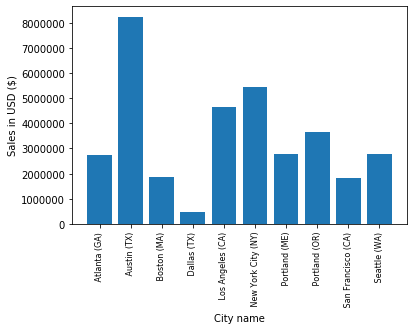

In [123]:
# Visualizing sales by city:

cities = [city for city, df in all_data.groupby('city')]

plt.bar(cities, cities_by_number_sales.sales)
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel("City name")